In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# In case there is a bug, just download stopwords again.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sudhakar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Stopwords are a list of 'useless' words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
train = pd.read_csv('malignantcommenttrain.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test = pd.read_csv('malignanatcommenttest.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
train.shape

(159571, 8)

In [9]:
test.shape

(153164, 2)

In [10]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,5b318161762f1b0a,""" \n\n == Mother section == \n\n Regarding my ..."
freq,1,1


In [13]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install plotly

     |████████████████████████████████| 13.2 MB 123 kB/s eta 0:00:01
Processing ./.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf/retrying-1.3.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


# EXPLORATORY DATA ANALYSIS by Pandas profiling 

In [17]:
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

pandas_profiling.ProfileReport(train)



Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [19]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [21]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

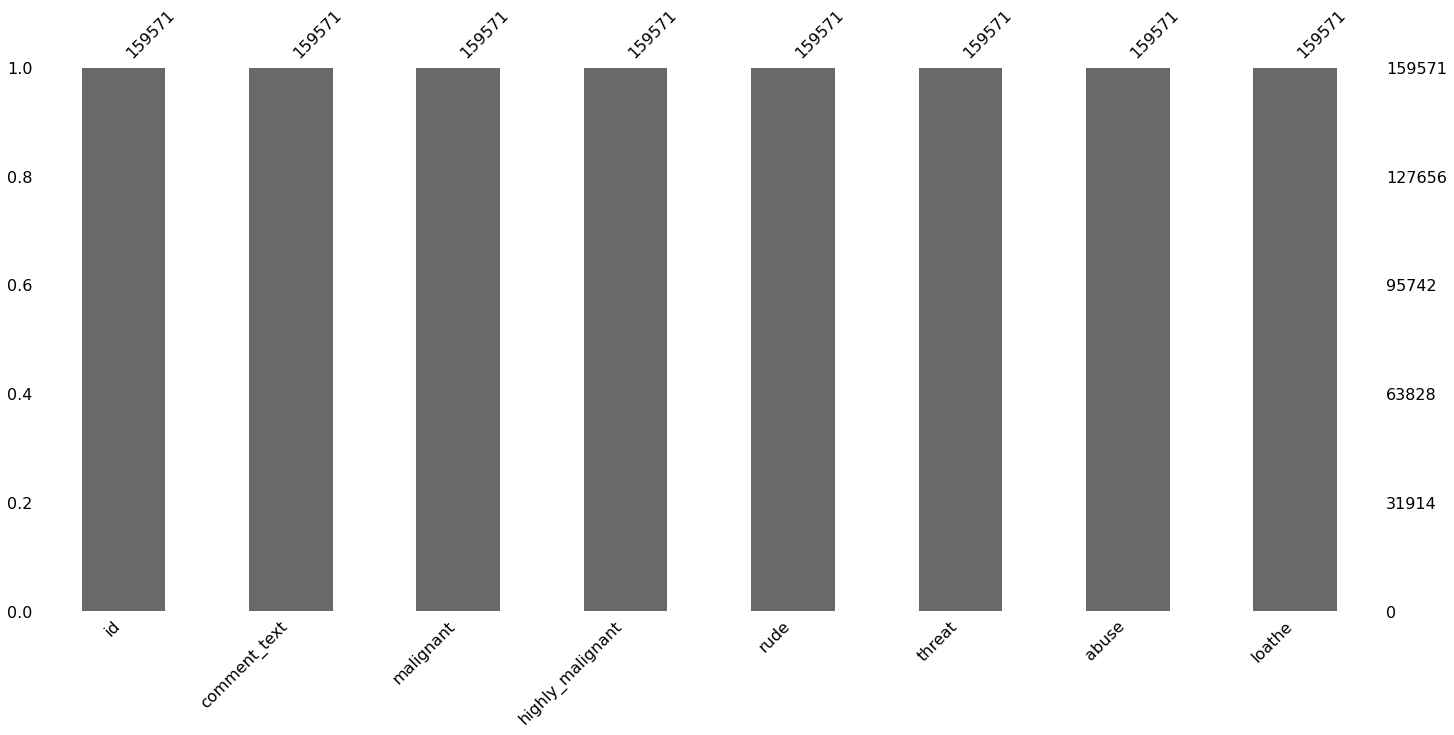

In [22]:
import pandas as pd
import missingno as msno
msno.bar(train)

<AxesSubplot:>

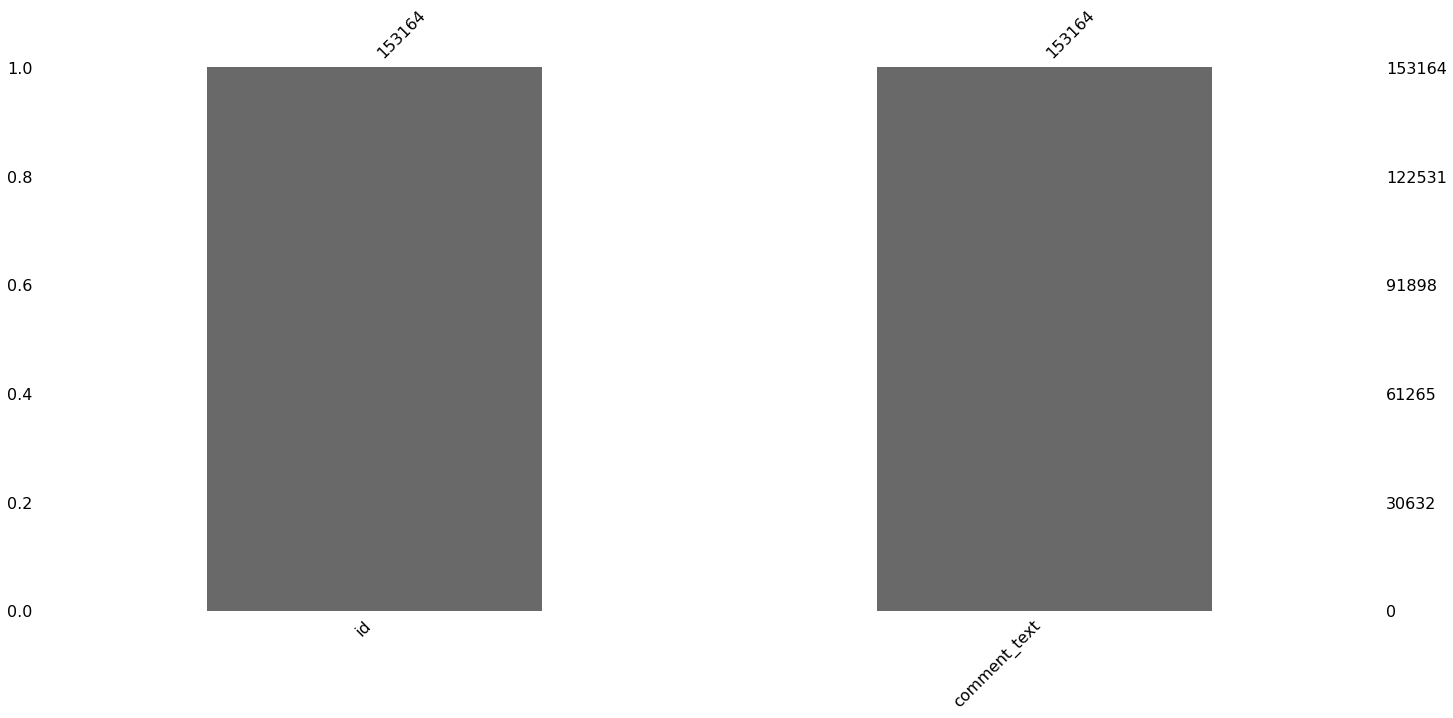

In [23]:
msno.bar(test)

In [27]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=train.iloc[:,2:].sum()

In [28]:
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



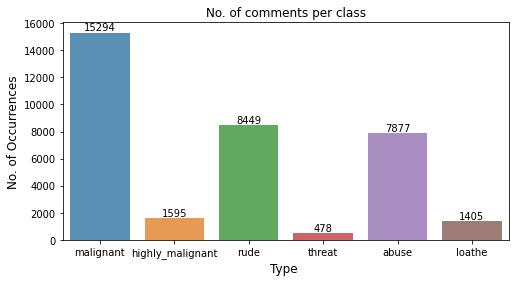

In [29]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


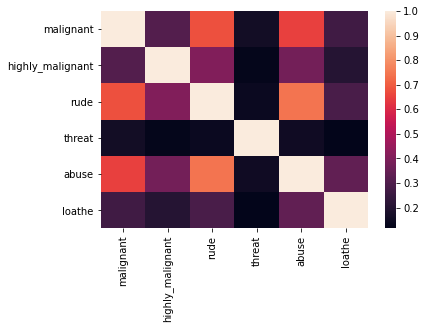

In [30]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

In [31]:
train.value_counts()

id                comment_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<AxesSubplot:>

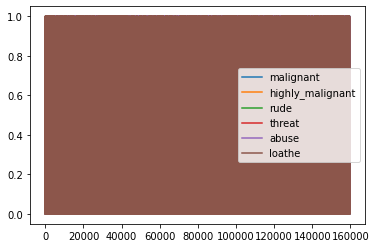

In [32]:
train.plot()

malignant


0    144277
1     15294
Name: malignant, dtype: int64


/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


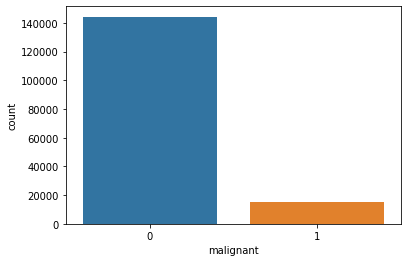

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


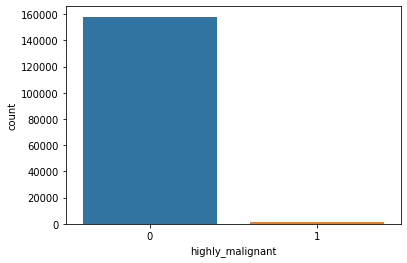

loathe


0    158166
1      1405
Name: loathe, dtype: int64


/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


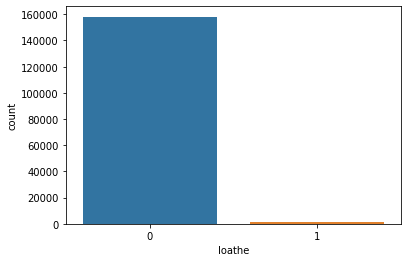

rude


0    151122
1      8449
Name: rude, dtype: int64


/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


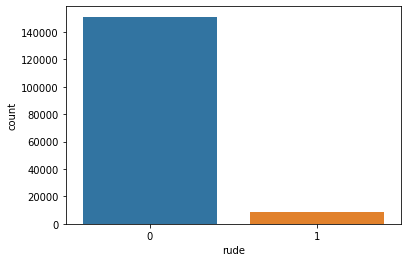

abuse


0    151694
1      7877
Name: abuse, dtype: int64


/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


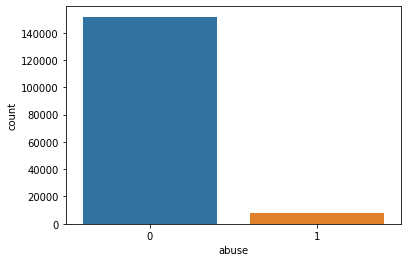

threat


0    159093
1       478
Name: threat, dtype: int64


/home/sudhakar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


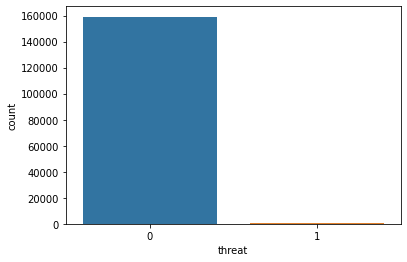

In [12]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

# data visualisation tool autoviz

In [15]:
!pip install autoviz

In [23]:
%%capture
import pandas as pd 
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()

In [24]:
df = AV.AutoViz('malignantcommenttrain.csv')


Shape of your Data Set: (159571, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 159571 exceeds maximum, randomly sampling 150000 rows for EDA...
No continuous variables in this data set. No visualization can be performed
Not able to read or load file. Please check your inputs and try again...


In [12]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
train['comment_text'] = train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

train['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [13]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,259
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,106
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,67


In [14]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

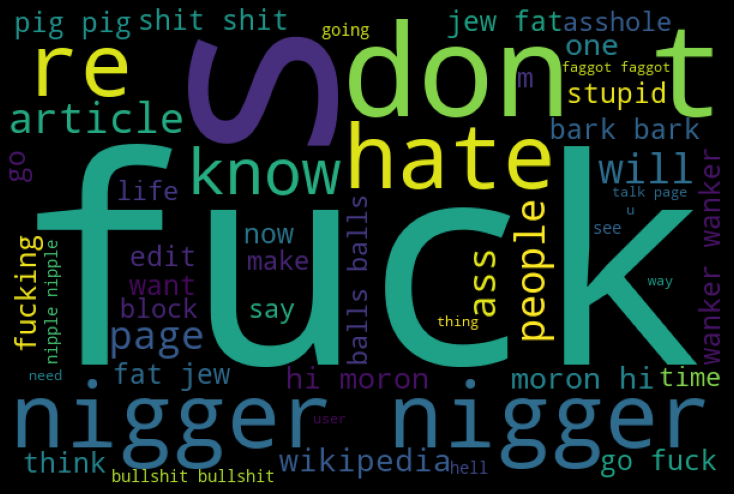

In [15]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


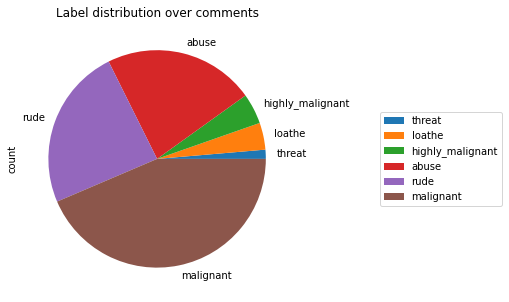

In [17]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [18]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


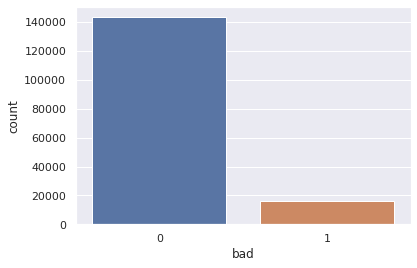

In [19]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [20]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [21]:
train.shape

(159571, 10)

In [22]:
test.shape

(153164, 2)

In [23]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_length,bad
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,259,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,106,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,622,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,67,0


# splitting training and testing data

In [53]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [25]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [57]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9597221103143269
Test accuracy is 0.9555063502673797
[[42728   222]
 [ 1908  3014]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [58]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987824420988549
Test accuracy is 0.9407586898395722
[[41619  1331]
 [ 1505  3417]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42950
           1       0.72      0.69      0.71      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



In [26]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9989614947313763
Test accuracy is 0.955548128342246
[[42396   554]
 [ 1574  3348]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [76]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[15:33:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9605547050555511
Test accuracy is 0.9524565508021391
[[42683   267]
 [ 2009  2913]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [77]:

#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9506441418454955
Test accuracy is 0.9490516377005348
[[42548   402]
 [ 2037  2885]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.59      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [ ]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


In [42]:
#grid cv RandomForestClassifier
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# hyper parameter tuning

In [43]:
rfc=RandomForestClassifier(random_state=42)

In [44]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [45]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [46]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [47]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [49]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
rfc1.score(x_test, y_test)

0.8973721590909091

In [52]:
y_pred_train = rfc1.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = rfc1.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.8990590784161004
Test accuracy is 0.8973721590909091
[[42950     0]
 [ 4913     9]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     42950
           1       1.00      0.00      0.00      4922

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.47     47872
weighted avg       0.91      0.90      0.85     47872



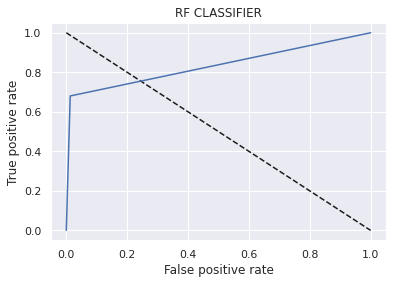

In [29]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [33]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [34]:
prediction=RF.predict(test_data)
prediction

array([0, 1, 0, ..., 1, 0, 0])

In [36]:
import pandas as pd

In [38]:
df = pd.DataFrame(prediction)

In [39]:
df.to_csv('malignant_comment_output.csv')

In [40]:
import joblib
joblib.dump(RF,"malignant_comment.pkl")

['malignant_comment.pkl']